In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

from pymoo.factory import get_performance_indicator
from testsuite.utilities import Pareto_split, get_target_igd_refpoints
from testsuite.analysis import load_all #, plot_all_pareto_2d, PLOT_STYLE, plot_measure
from problem_setup import func, y, weighting, n_obj, n_dim

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from testsuite import directed_optimisers 
from pymoo.factory import get_performance_indicator
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import inspect

In [3]:
from generate_queue import dmvs 

In [4]:
def get_target_from_str(string):
    ind = string.find('[')
    tstring = string[ind+1:-1]
    for target in targets:
        str_t = str(target).replace('.', 'p').replace(' ', '_')
        if tstring == str_t:
            return target

In [16]:
def load_result(directory):
    result = load_all(directory, trailing_text = "_results.pkl")
    name = get_name_from_dir(directory)
    result['name'] = name
    return result

def get_name_from_dir(dir_string):
    bits = dir_string.split('_')
    print([bit for bit in bits])
    name = [bit for bit in bits if bit.lower() in OPTIMISER_NAMES]
    print(name)
    if type(name) is list:
        name = name[0]
    if 'ei' in bits:
        name+='_ei'
    elif 'mean' in bits:
        name+='_$\mu$'
    return name

In [17]:
names = ['Mpoi', 'ParEgo', 'Saf_ei', 'Saf_$\\mu$', 'SmsEgo_ei', 'SmsEgo_$\\mu$', 'lhs']
true_names = ['MPoI', 'ParEGO', 'SAF: ei', 'SAF: $\mu$', 'SMS-EGO: ei', 'SMS-EGO: $\mu$', 'LHS']
D_names = {a:b for a, b in zip(names, true_names)}

In [18]:
OPTIMISER_NAMES = [cls[0].lower() for cls in inspect.getmembers(directed_optimisers, inspect.isclass)
        if cls[1].__module__ == 'testsuite.directed_optimisers' or cls[1].__module__ == 'testsuite.directedoptimisers']

In [19]:
OPTIMISER_NAMES

['directedsaf', 'dmvector']

In [20]:
problem_path = './'

In [22]:
# load all results from directory tree
result_dirs = sorted(os.listdir(os.path.join(problem_path, "log_data/")))
result_dirs = [r for r in result_dirs if r != '.ipynb_checkpoints']
results= []
for directory in result_dirs:
    file_path = os.path.join(problem_path, 'log_data/',  directory) 
    result = load_result(file_path)
    results.append(result)
result_dirs

['./log', 'data/WFG5', 'DmVector', 'init10', 'MultiSurrogate', 'GP', 'w', '0p5', 'dmv', '', '0p37139068', '0p92847669', '']
['DmVector']
['./log', 'data/WFG5', 'DmVector', 'init10', 'MultiSurrogate', 'GP', 'w', '0p5', 'dmv', '', '0p83205029', '0p5547002', '', '']
['DmVector']


['WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p37139068_0p92847669_',
 'WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002__']

In [23]:
p = np.load('../../../comp/igd_refpoints/problem_refpoints/data/wfg_elipse_2d_refpoints')[::10]
p.shape

(500, 2)

In [34]:
results[0]

{'objective_function': ['WFG5',
  'WFG5',
  'WFG5',
  'WFG5',
  'WFG5',
  'WFG5',
  'WFG5',
  'WFG5',
  'WFG5',
  'WFG5',
  'WFG5'],
 'limits': [[array([0., 0., 0., 0., 0., 0.]),
   array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])],
  [array([0., 0., 0., 0., 0., 0.]), array([ 2.,  4.,  6.,  8., 10., 12.])]],
 'n_initial': [10

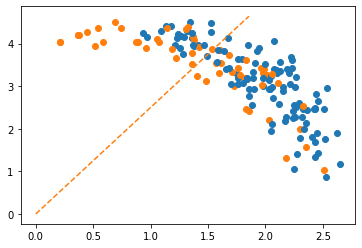

In [39]:
fig = plt.figure()
ax = fig.gca()

dmv = np.array([0.37139068, 0.92847669])
ax.plot(*np.vstack((np.zeros(2), dmv*5)).T, c="C1", linestyle="--")

for i in range(11): 
    ys = results[0]['y'][i]
    ax.scatter(*ys[:10].T, c="C0")
    ax.scatter(*ys[10:].T, c="C1")

In [42]:
results[1]['log_filename']

['seed_04_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b2be9ee6-e3c4-11eb-b218-9ba2d3814309',
 'seed_06_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b2defd94-e3c4-11eb-b218-9ba2d3814309',
 'seed_01_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b28db7f4-e3c4-11eb-b218-9ba2d3814309',
 'seed_08_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b2ff3686-e3c4-11eb-b218-9ba2d3814309',
 'seed_05_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b2cea32c-e3c4-11eb-b218-9ba2d3814309',
 'seed_00_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b276885e-e3c4-11eb-b218-9ba2d3814309',
 'seed_09_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b30f5aca-e3c4-11eb-b218-9ba2d3814309',
 'seed_10_WFG5_DmVector_init10_MultiSurrogate_GP_w_0p5_dmv__0p83205029_0p5547002___b31f9ed0-e3c4-11eb-b218-9ba2d3814309',
 'seed_07_WFG5_DmVector_

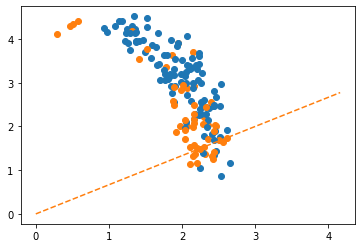

In [45]:
fig = plt.figure()
ax = fig.gca()

dmv = np.array([0.83205029, 0.5547002])
ax.plot(*np.vstack((np.zeros(2), dmv*5)).T, c="C1", linestyle="--")

for i in range(11): 
    ys = results[1]['y'][i]
    ax.scatter(*ys[:10].T, c="C0")
    ax.scatter(*ys[10:].T, c="C1")

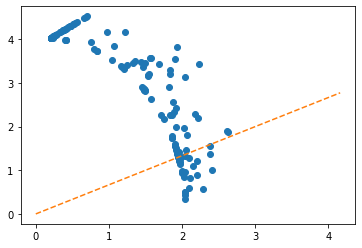

In [41]:
ys = results[1]['y'][0]
dmv = np.array([0.83205029, 0.5547002])

results[0].keys()

fig = plt.figure()
ax = fig.gca()
ax.scatter(*ys.T, c="C0")
ax.plot(*np.vstack((np.zeros(2), dmv*5)).T, c="C1", linestyle="--")

IndexError: list index out of range

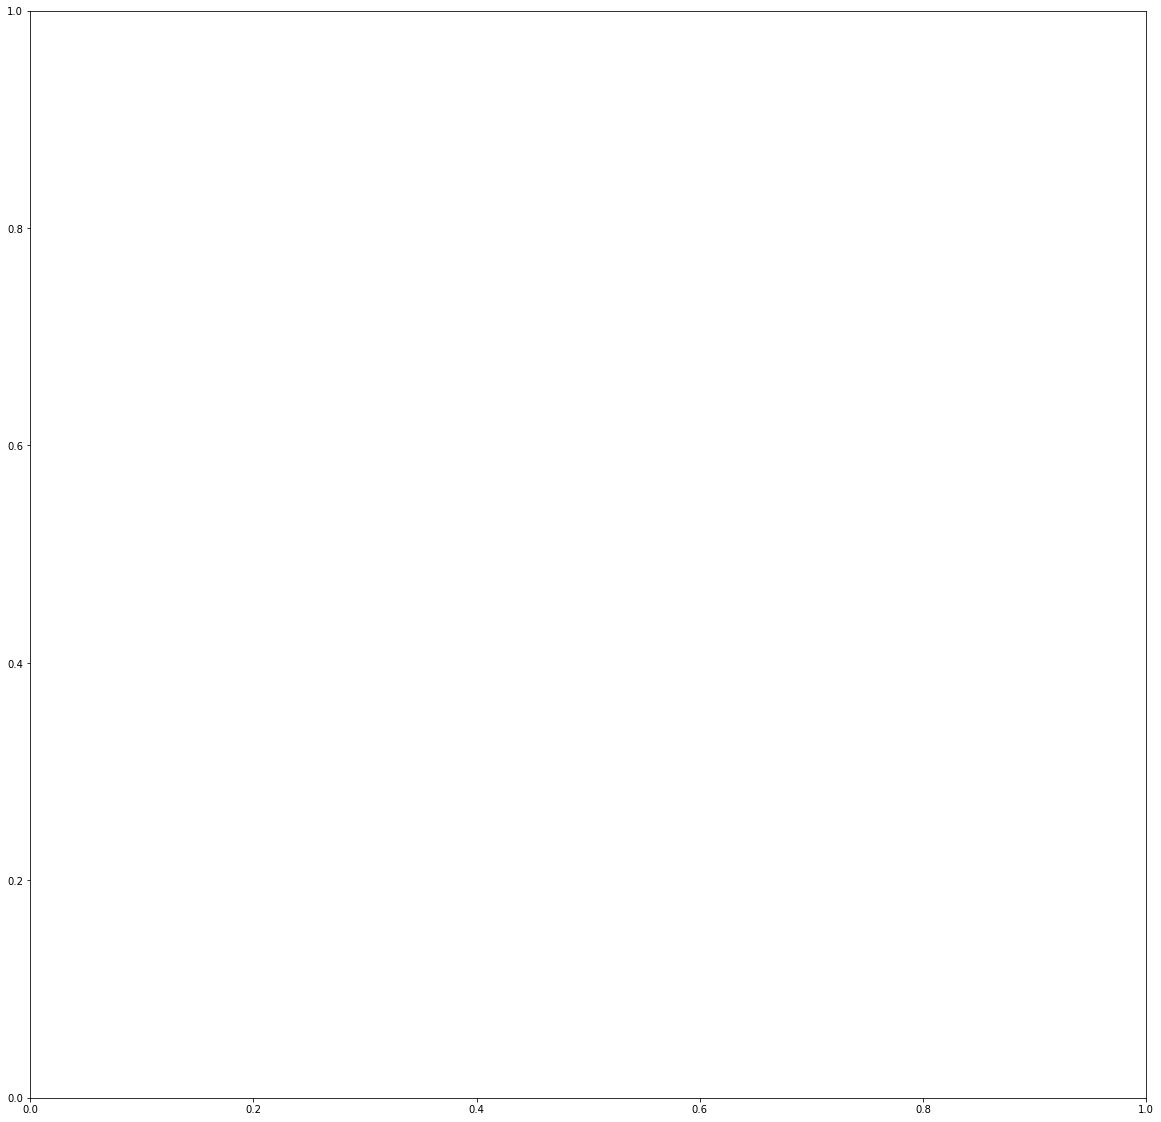

In [21]:
t_num = 5
stage=150

fig0 = plt.figure(figsize=[20, 20])
fig0_ax = fig0.gca()
pp, dd = Pareto_split(results[0]['y'][i][:stage])
fig0_ax.scatter(*pp.T, c="C0", s=5)
    
fig0_ax.scatter(*pd.T, c="lightgrey", s=5)
fig0_ax.scatter(*pt.T, c="magenta", s=5)
fig0_ax.scatter(*target.T, c="magenta")
fig0_ax.axis('scaled')

fig1 = plt.figure(figsize=[19, 6])
fig1_ax0 = fig1.add_subplot(121)
fig1_ax1 = fig1.add_subplot(122)
for i in range(11):
    pp, dd = Pareto_split(results[t_num]['y'][i][:stage], return_indices=True)
    xs = results[0]['x'][i][:stage]
    for j in range(6):
        fig1_ax0.scatter(np.ones(stage)*j+np.random.rand(stage)*0.5, xs[:,j], c="C0", s=5, alpha=0.4)

for i in range(11):
    pp, dd = Pareto_split(undirected_results[0]['y'][i][:stage], return_indices=True)
    xs = undirected_results[0]['x'][i][:stage]
    for j in range(6):
        fig1_ax1.scatter(np.ones(stage)*j+np.random.rand(stage)*10e-1, xs[:,j], c="C0", s=5)

igdp_measure = get_performance_indicator("igd+", pt)

stage_directed = []
stage_undirected = []
for stage in range(10, 150, 5):
    igdps_directed = []
    igdps_undirected = []
    for i in range(11):
        pp, dd = Pareto_split(results[t_num]['y'][i][:stage])
        igdp_directed = igdp_measure.calc(pp)
        pp, dd = Pareto_split(undirected_results[0]['y'][i][:stage])
        igdp_undirected = igdp_measure.calc(pp)
        igdps_directed.append(igdp_directed)
        igdps_undirected.append(igdp_undirected)
    stage_directed.append(igdps_directed)
    stage_undirected.append(igdps_undirected)

fig2 = plt.figure(figsize=[16, 8])
fig2_ax = fig2.gca()
fig2_ax.boxplot(stage_directed, positions=list(range(56))[::2], whiskerprops=dict(color="C0"));
fig2_ax.boxplot(stage_undirected, positions=list(range(56))[1::2], whiskerprops=dict(color="C1"));